# **DOWNLOAD DATA**

In [1]:
!wget 'https://drive.google.com/uc?export=download&id=1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9' -O Data_Negara_HELP.csv

--2021-04-18 07:19:14--  https://drive.google.com/uc?export=download&id=1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9
Resolving drive.google.com (drive.google.com)... 74.125.132.113, 74.125.132.138, 74.125.132.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hbogjfcoahn9q9srs0b9g0cba2gillk5/1618730325000/06287560445691811212/*/1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9?e=download [following]
--2021-04-18 07:19:14--  https://doc-08-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hbogjfcoahn9q9srs0b9g0cba2gillk5/1618730325000/06287560445691811212/*/1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9?e=download
Resolving doc-08-7g-docs.googleusercontent.com (doc-08-7g-docs.googleusercontent.com)... 74.125.129.132, 2607:f8b0:4001:c15::84
Connecting to doc-08-7g-docs.googleusercontent.com (doc-08

# **LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# **READ CSV**

In [3]:
df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# **DATA EXPLORATION**

In [4]:
X = df.drop('Negara', axis=1)

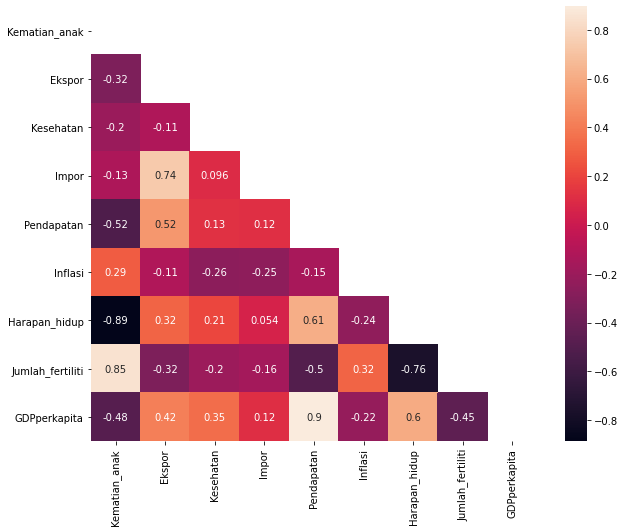

In [5]:
corr_X = X.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_X, dtype=bool))
sns.heatmap(corr_X, annot=True, mask=mask)

In [6]:
columns = np.full((corr_X.shape[0],), True, dtype=bool)
for i in range(corr_X.shape[0]):
    for j in range(i+1, corr_X.shape[0]):
        if corr_X.iloc[i,j] >= -0.2:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X_train = X[selected_columns]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kematian_anak  167 non-null    float64
 1   Ekspor         167 non-null    float64
dtypes: float64(2)
memory usage: 2.7 KB


# **PRE-PROCESSING**

## **OUTLIERS**

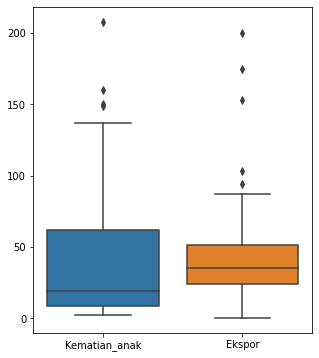

In [7]:
plt.figure(figsize=(5, 6))

sns.boxplot(
    data=X_train
)

In [8]:
# Kematian_anak
Q1 = X_train['Kematian_anak'].quantile(.25)
Q3 = X_train['Kematian_anak'].quantile(.75)
IQR = Q3 - Q1
lb = Q1 - (IQR * 1.5)
ub = Q3 + (IQR * 1.5)
X_train['Kematian_anak'] = X_train['Kematian_anak'].apply(lambda x: ub if x > ub else lb if x < lb else x)

# Ekspor
Q1 = X_train['Ekspor'].quantile(.25)
Q3 = X_train['Ekspor'].quantile(.75)
IQR = Q3 - Q1
lb = Q1 - (IQR * 1.5)
ub = Q3 + (IQR * 1.5)
X_train['Ekspor'] = X_train['Ekspor'].apply(lambda x: ub if x > ub else lb if x < lb else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


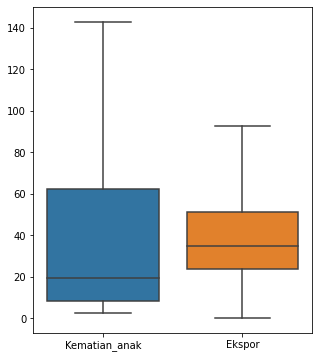

In [9]:
plt.figure(figsize=(5, 6))

sns.boxplot(
    data=X_train
)

## **SCALING**

In [10]:
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)

# **MODELLING**

Text(0, 0.5, 'Ekspor')

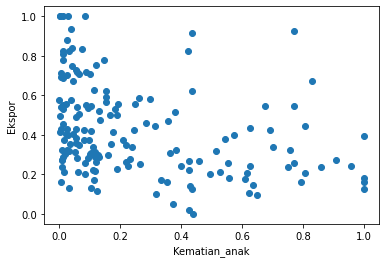

In [11]:
plt.scatter(
    X_train_scale[:, 0],
    X_train_scale[:, 1]
)

plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Ekspor')

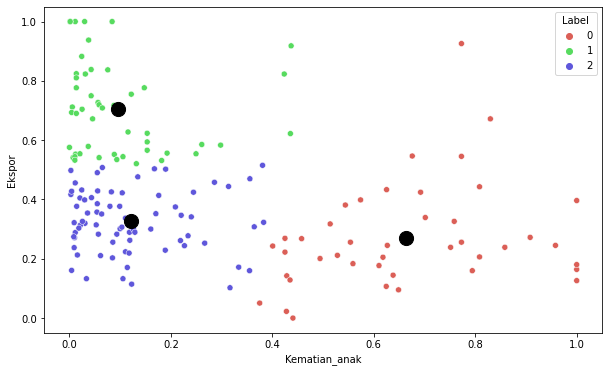

In [12]:
km = KMeans(n_clusters=3).fit(X_train_scale)
X_train['Label'] = km.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(
    X_train_scale[:, 0],
    X_train_scale[:, 1],
    hue=X_train['Label'],
    palette=sns.color_palette('hls', 3)
)

centers = km.cluster_centers_
plt.scatter(centers[:,0], 
            centers[:,1], 
            c='black', 
            s=200, 
            alpha=1, 
            marker='o'
)

plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])

Text(0.5, 0, 'Cluster')

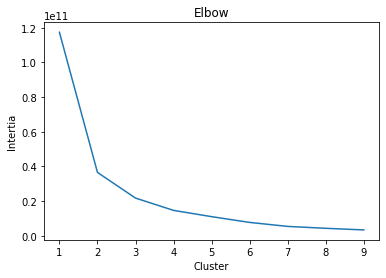

In [13]:
cluster = []
for i in range(1, 10):
  km = KMeans(n_clusters=i).fit(X)
  cluster.append(km.inertia_)

plt.plot(
    range(1, 10),
    cluster
)
plt.title('Elbow')
plt.ylabel('Intertia')
plt.xlabel('Cluster')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Ekspor')

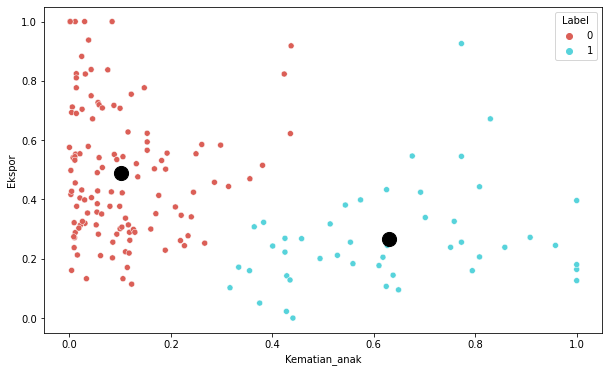

In [14]:
km2 = KMeans(n_clusters=2).fit(X_train_scale)
X_train['Label'] = km2.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(
    X_train_scale[:, 0],
    X_train_scale[:, 1],
    hue=X_train['Label'],
    palette=sns.color_palette('hls', 2)
)

centers = km2.cluster_centers_
plt.scatter(
    centers[:,0], 
    centers[:,1], 
    c='black', 
    s=200, 
    alpha=1, 
    marker='o'
)

plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])

In [18]:
data = pd.DataFrame([df['Negara'], df['Kematian_anak'], df['Ekspor'], X_train['Label']]).T
np.array(data[data['Label'] == 1].Negara)

array(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati', 'Lao',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan',
       'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan',
       'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)